In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import fredapi as fd

In [2]:
# Get Fred API Key
api_key = '133ebd78e6c501a52ce4fb113a8e6906'
fred = fd.Fred(api_key = api_key)

In [3]:
economic_indicators = [
    'CPIAUCSL',  # Consumer Price Index
    'PPIACO',     # Producer Price Index
    'GS10',       # 10-Year Treasury Constant Maturity Rate
    'UNRATE',     # Unemployment Rate
    'RSXFS',      # Retail Sales
    'UMCSENT',    # Consumer Sentiment Index
    'FEDFUNDS',   # Effective Federal Funds Rate
    'DCOILWTICO', # Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma
    'PPIACO',     # Producer Price Index for All Commodities
    'CUSR0000SEHF', # CPI for Rent of Primary Residence
    'INDPRO',     # Industrial Production Index
    'PCEPILFE',   # Personal Consumption Expenditures Excluding Food and Energy
    'DEXUSEU', # U.S. Dollars to Euro Spot Exchange Rate
    'DEXJPUS', # Japanese Yen to U.S. Dollar Spot Exchange Rate
    'DEXCHUS', # Chinese Yuan Renminbi to U.S. Dollar Spot Exchange Rate
    'ID7108', # Gold price
    'SP500' # SP500 price
    
]

# Define the time period
start_date = '2015-01-21'
end_date = '2022-12-01'


economic_data = pd.DataFrame()
for indicator in economic_indicators:
    try:
        data =  fred.get_series(indicator, start_date, end_date , frequency='m') 
        economic_data[indicator] = data
    except Exception as e:
            print(indicator)
            continue

economic_data

,CPIAUCSL,PPIACO,GS10,UNRATE,RSXFS,UMCSENT,FEDFUNDS,DCOILWTICO,CUSR0000SEHF,INDPRO,PCEPILFE,DEXUSEU,DEXJPUS,DEXCHUS,ID7108,SP500
2015-01-01,234.747,192.000,1.88,5.7,385312.0,98.1,0.11,47.22,203.197,102.8239,96.214,1.1615,118.25,6.2181,438.0,2028.18
2015-02-01,235.342,191.100,1.98,5.5,384779.0,95.4,0.11,50.58,202.869,102.1513,96.324,1.1350,118.76,6.2518,455.8,2082.20
2015-03-01,235.976,191.500,2.04,5.4,390738.0,93.0,0.11,47.82,200.887,101.8240,96.470,1.0819,120.39,6.2386,433.9,2079.99
2015-04-01,236.222,190.900,1.94,5.4,391246.0,95.9,0.12,54.45,199.886,101.2440,96.648,1.0822,119.51,6.2010,436.7,2094.86
2015-05-01,237.001,193.400,2.20,5.6,394260.0,90.7,0.12,59.27,198.157,100.7830,96.766,1.1167,120.80,6.2035,430.8,2111.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,295.209,269.546,2.90,3.6,590987.0,58.2,2.33,93.67,264.318,103.2344,115.158,1.0129,135.28,6.8007,642.5,4158.56
2022-09-01,296.341,267.898,3.52,3.5,588894.0,58.6,2.56,84.26,267.226,103.5283,115.686,0.9899,143.28,7.0195,620.1,3850.52
2022-10-01,297.863,265.061,3.98,3.6,595839.0,59.9,3.08,87.55,264.840,103.4114,116.087,0.9853,147.05,7.1902,615.8,3726.05
2022-11-01,298.648,263.157,3.89,3.6,588309.0,56.7,3.78,84.37,261.604,103.0707,116.417,1.0192,142.45,7.1812,597.9,3917.49


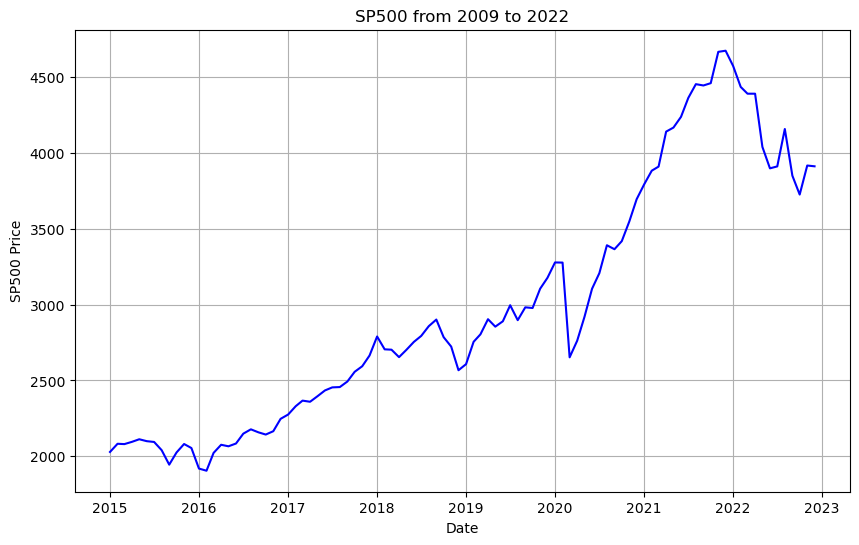

In [4]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(economic_data.index, economic_data['SP500'], color='blue', linestyle='-')
plt.title('SP500 from 2009 to 2022')
plt.xlabel('Date')
plt.ylabel('SP500 Price')
plt.grid(True)
plt.show()

In [5]:
import numpy as np

tranformed_data = df = pd.DataFrame()
# Percentage Change
tranformed_data['CPIAUCSL'] = economic_data['CPIAUCSL'].pct_change()
tranformed_data['PPIACO'] = economic_data['PPIACO'].pct_change()
tranformed_data['GS10'] = economic_data['GS10'].pct_change()
tranformed_data['UNRATE'] = economic_data['UNRATE'].pct_change()
tranformed_data['RSXFS'] = economic_data['RSXFS'].pct_change()
tranformed_data['UMCSENT'] = economic_data['UMCSENT'].pct_change()
tranformed_data['FEDFUNDS'] = economic_data['FEDFUNDS'].pct_change()
tranformed_data['DCOILWTICO'] = economic_data['DCOILWTICO'].pct_change()
tranformed_data['CUSR0000SEHF'] = economic_data['CUSR0000SEHF'].pct_change()
tranformed_data['INDPRO'] = economic_data['INDPRO'].pct_change()
tranformed_data['PCEPILFE'] = economic_data['PCEPILFE'].pct_change()
tranformed_data['DEXUSEU'] = economic_data['DEXUSEU'].pct_change()
tranformed_data['DEXJPUS'] = economic_data['DEXJPUS'].pct_change()
tranformed_data['DEXCHUS'] = economic_data['DEXCHUS'].pct_change()
tranformed_data['ID7108'] = economic_data['ID7108'].pct_change()
tranformed_data['SP500'] = economic_data['SP500'].pct_change()

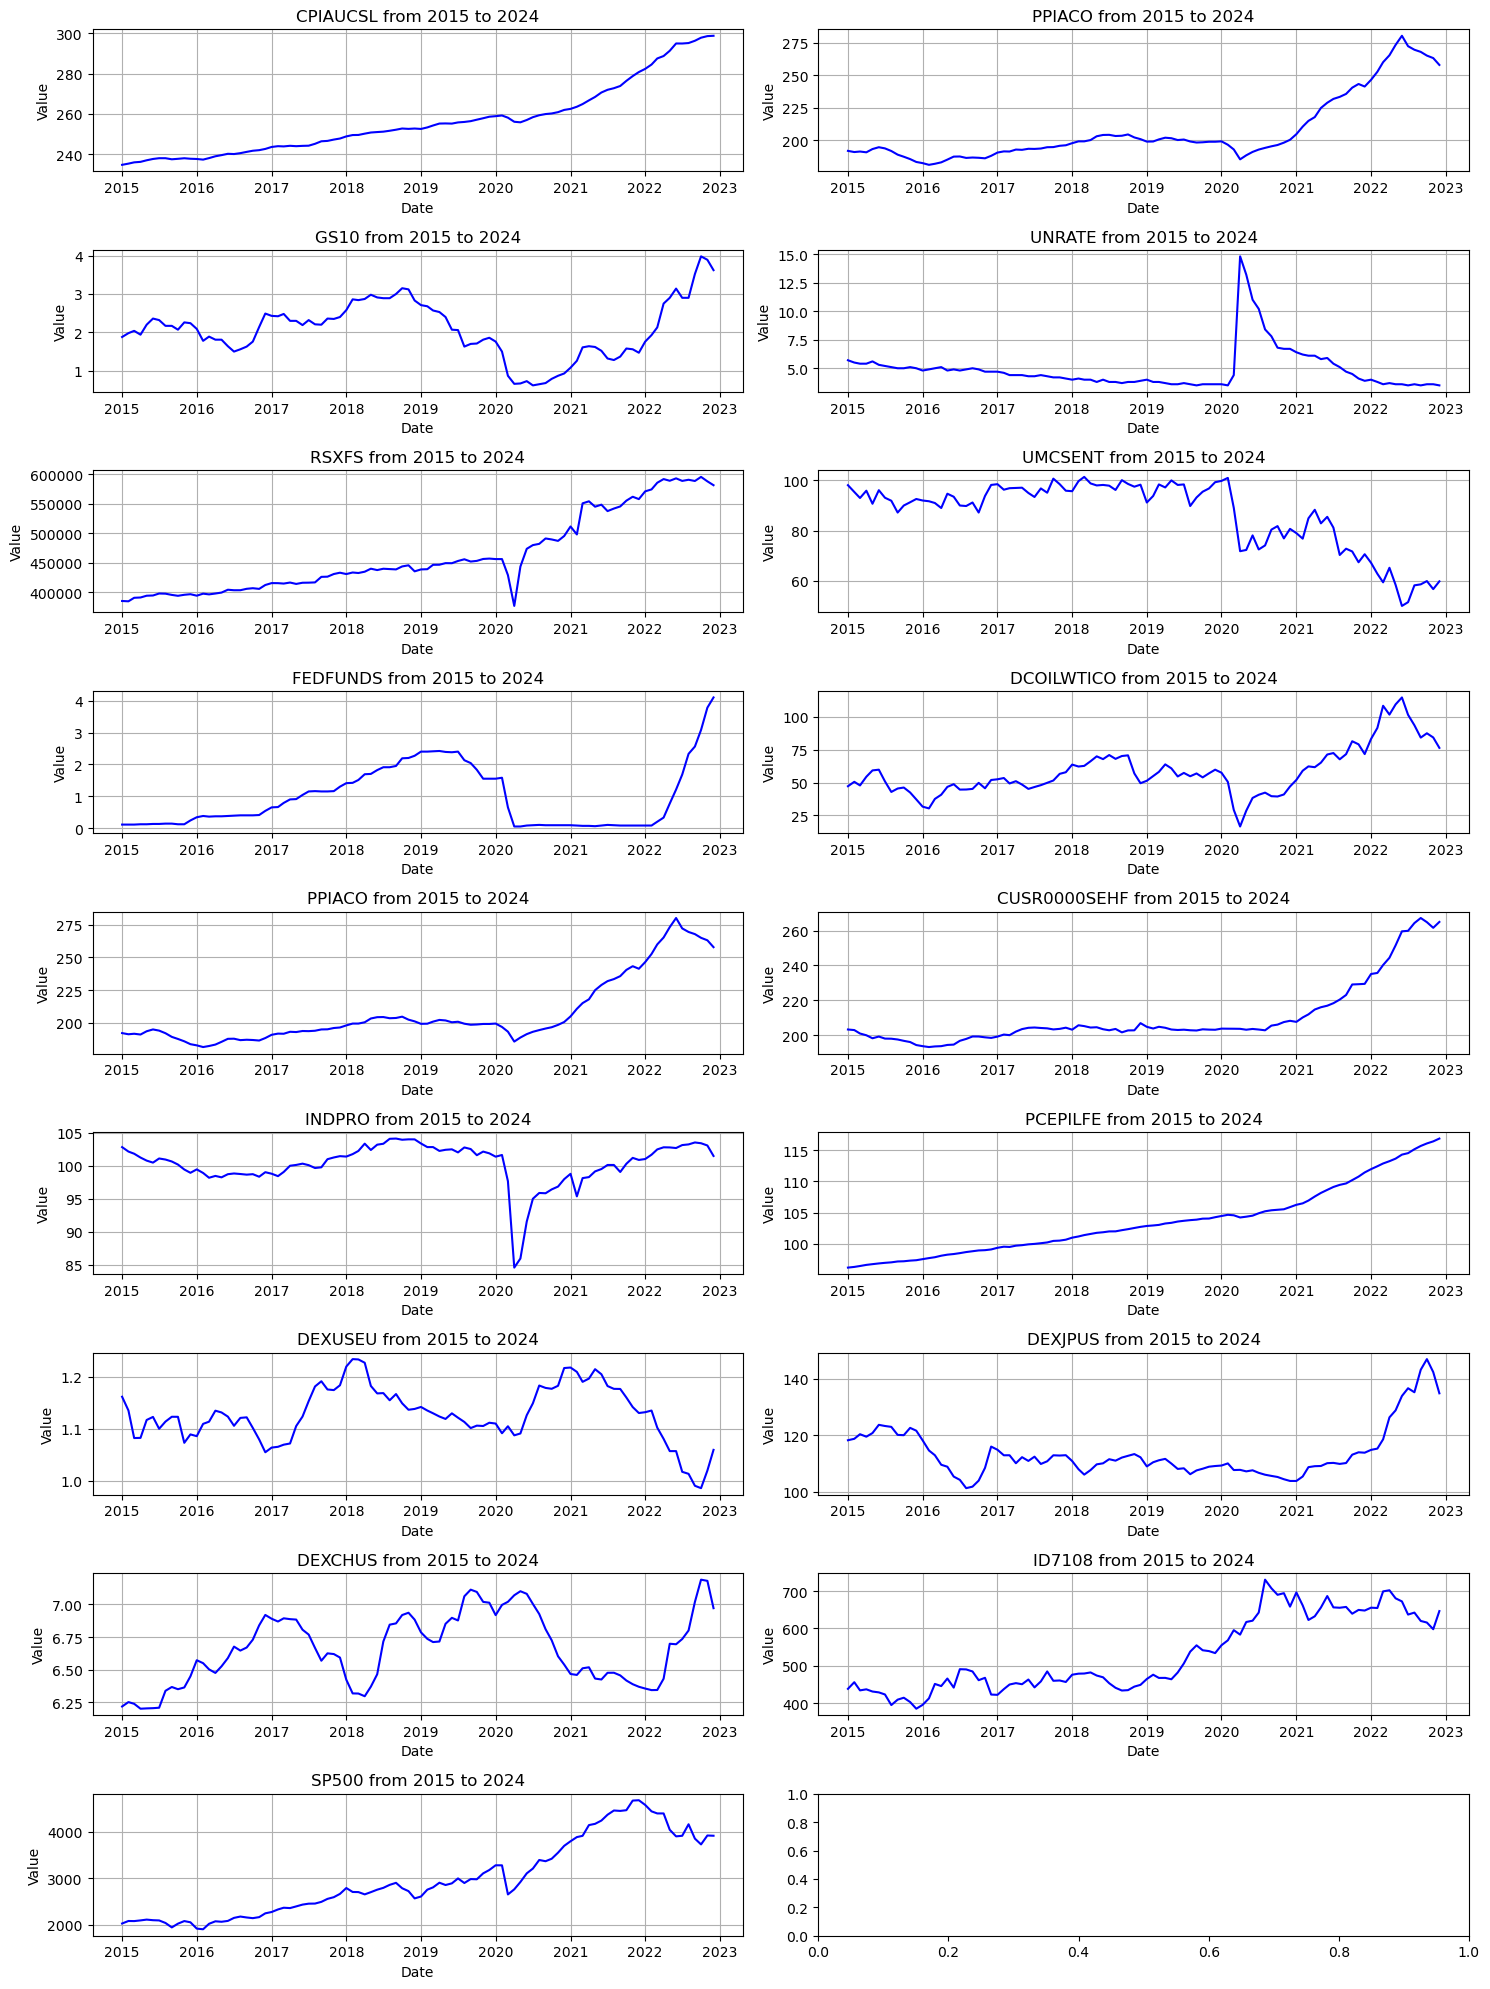

In [6]:
# Calculate number of rows and columns for the grid layout
num_rows = (len(economic_indicators) + 1) // 2
num_cols = 2

# Create subplots with the specified layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array if it's more than 1D
if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Plot each economic indicator in a separate subplot
for i, indicator in enumerate(economic_indicators):
    ax = axes[i]
    ax.plot(economic_data.index, economic_data[indicator], color='blue')
    ax.set_title(f'{indicator} from 2015 to 2024')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [7]:
tranformed_data

,CPIAUCSL,PPIACO,GS10,UNRATE,RSXFS,UMCSENT,FEDFUNDS,DCOILWTICO,CUSR0000SEHF,INDPRO,PCEPILFE,DEXUSEU,DEXJPUS,DEXCHUS,ID7108,SP500
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,0.002535,-0.004688,0.053191,-0.035088,-0.001383,-0.027523,0.000000,0.071156,-0.001614,-0.006541,0.001143,-0.022815,0.004313,0.005420,0.040639,0.026635
2015-03-01,0.002694,0.002093,0.030303,-0.018182,0.015487,-0.025157,0.000000,-0.054567,-0.009770,-0.003204,0.001516,-0.046784,0.013725,-0.002111,-0.048047,-0.001061
2015-04-01,0.001042,-0.003133,-0.049020,0.000000,0.001300,0.031183,0.090909,0.138645,-0.004983,-0.005696,0.001845,0.000277,-0.007310,-0.006027,0.006453,0.007149
2015-05-01,0.003298,0.013096,0.134021,0.037037,0.007704,-0.054223,0.000000,0.088522,-0.008650,-0.004553,0.001221,0.031880,0.010794,0.000403,-0.013510,0.008153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.000787,-0.010019,0.000000,0.028571,0.003307,0.130097,0.386905,-0.078233,0.017116,0.000985,0.005448,-0.003836,-0.010460,0.009725,0.008318,0.063100
2022-09-01,0.003835,-0.006114,0.213793,-0.027778,-0.003542,0.006873,0.098712,-0.100459,0.011002,0.002847,0.004585,-0.022707,0.059137,0.032173,-0.034864,-0.074074
2022-10-01,0.005136,-0.010590,0.130682,0.028571,0.011793,0.022184,0.203125,0.039046,-0.008929,-0.001129,0.003466,-0.004647,0.026312,0.024318,-0.006934,-0.032326
2022-11-01,0.002635,-0.007183,-0.022613,0.000000,-0.012638,-0.053422,0.227273,-0.036322,-0.012219,-0.003295,0.002843,0.034406,-0.031282,-0.001252,-0.029068,0.051379


In [8]:

lagged_data = df = pd.DataFrame()

# Define the lag for each indicator in months
lags = {
    'CPIAUCSL': 1,
    'PPIACO': 1,
    'GS10': 1,
    'UNRATE': 1,
    'RSXFS': 1,
    'UMCSENT': 1,
    'FEDFUNDS': 1,
    'DCOILWTICO': 1,
    'PPIACO': 1,
    'CUSR0000SEHF': 1,
    'INDPRO': 1,
    'PCEPILFE': 1,
    'DEXUSEU': 1,  
    'DEXJPUS': 1,
    'DEXCHUS': 1,
    'ID7108':1
}

# Loop through each indicator and lag it according to the defined lag
for indicator, lag in lags.items():
    lagged_data[f'{indicator}'] = tranformed_data[indicator].shift(lag)
    
 
lagged_data['SP500_binary'] = (tranformed_data['SP500'] > 0).astype(int)

# Drop rows with NaN values created by the lagging process
lagged_data.dropna(inplace=True)


In [9]:
lagged_data

,CPIAUCSL,PPIACO,GS10,UNRATE,RSXFS,UMCSENT,FEDFUNDS,DCOILWTICO,CUSR0000SEHF,INDPRO,PCEPILFE,DEXUSEU,DEXJPUS,DEXCHUS,ID7108,SP500_binary
2015-03-01,0.002535,-0.004688,0.053191,-0.035088,-0.001383,-0.027523,0.000000,0.071156,-0.001614,-0.006541,0.001143,-0.022815,0.004313,0.005420,0.040639,0
2015-04-01,0.002694,0.002093,0.030303,-0.018182,0.015487,-0.025157,0.000000,-0.054567,-0.009770,-0.003204,0.001516,-0.046784,0.013725,-0.002111,-0.048047,1
2015-05-01,0.001042,-0.003133,-0.049020,0.000000,0.001300,0.031183,0.090909,0.138645,-0.004983,-0.005696,0.001845,0.000277,-0.007310,-0.006027,0.006453,1
2015-06-01,0.003298,0.013096,0.134021,0.037037,0.007704,-0.054223,0.000000,0.088522,-0.008650,-0.004553,0.001221,0.031880,0.010794,0.000403,-0.013510,0
2015-07-01,0.002768,0.007239,0.072727,-0.053571,0.000994,0.059537,0.083333,0.009280,0.005001,-0.003025,0.001199,0.005283,0.024172,0.000274,-0.005339,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,-0.000064,-0.028464,-0.076433,-0.027778,-0.007282,0.030000,0.388430,-0.115117,0.001136,0.004348,0.002074,-0.037759,0.020529,0.005974,-0.052491,1
2022-09-01,0.000787,-0.010019,0.000000,0.028571,0.003307,0.130097,0.386905,-0.078233,0.017116,0.000985,0.005448,-0.003836,-0.010460,0.009725,0.008318,0
2022-10-01,0.003835,-0.006114,0.213793,-0.027778,-0.003542,0.006873,0.098712,-0.100459,0.011002,0.002847,0.004585,-0.022707,0.059137,0.032173,-0.034864,0
2022-11-01,0.005136,-0.010590,0.130682,0.028571,0.011793,0.022184,0.203125,0.039046,-0.008929,-0.001129,0.003466,-0.004647,0.026312,0.024318,-0.006934,1


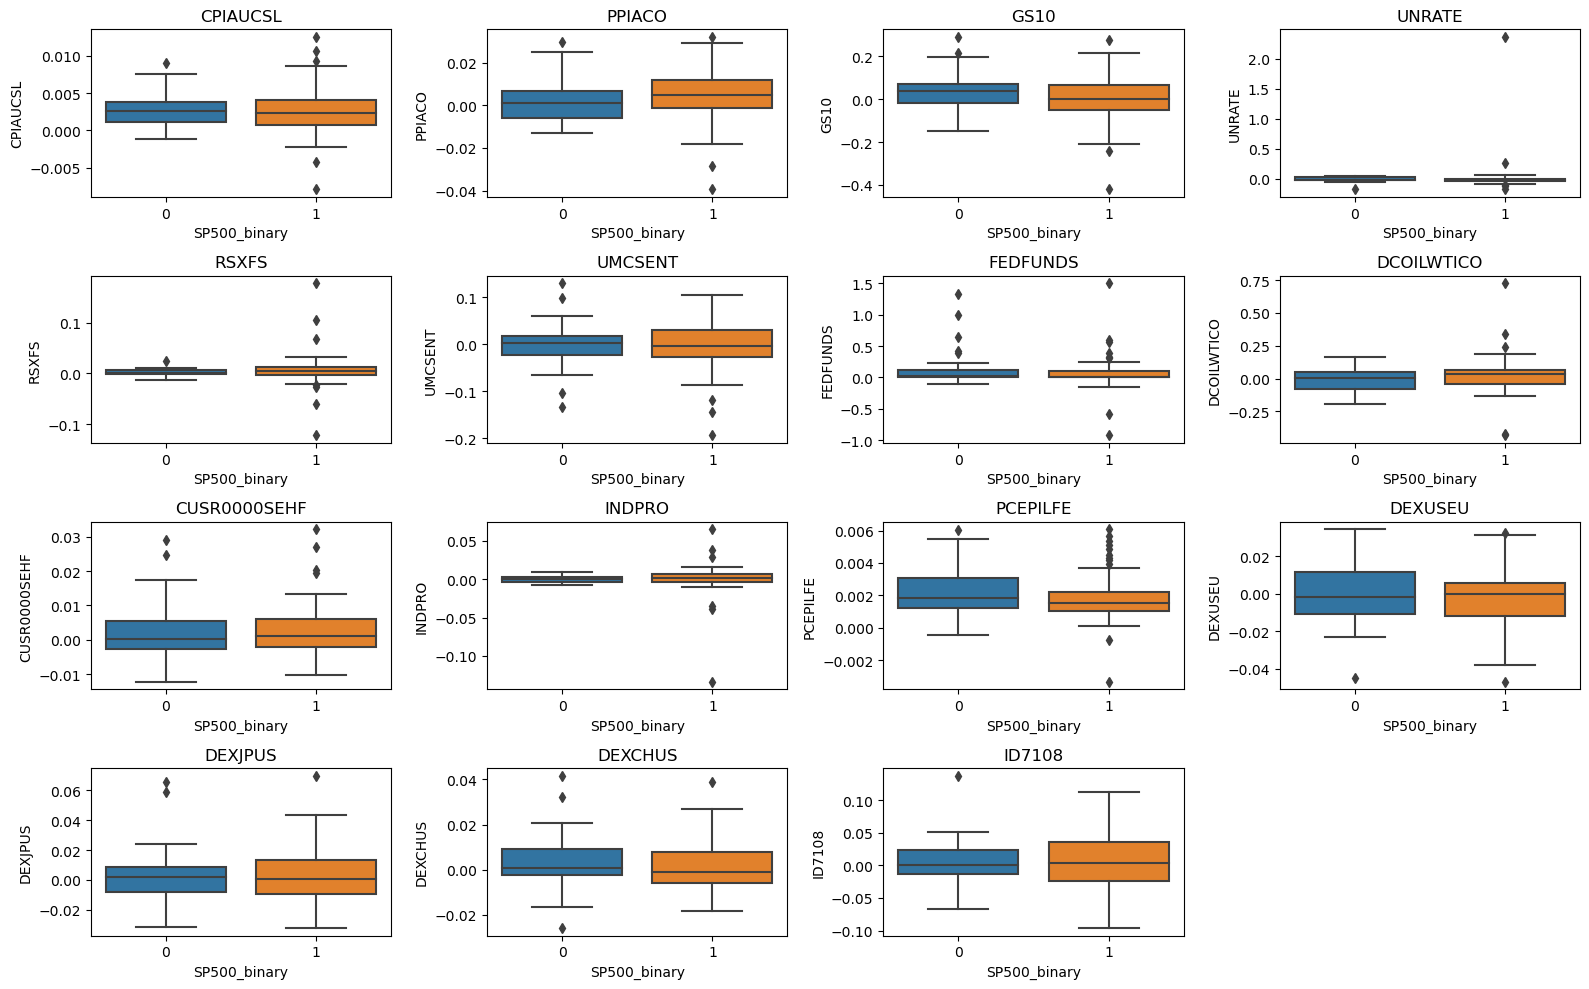

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the figure size
plt.figure(figsize=(16, 10))

# Loop through each feature and draw box plots
for i, (indicator, _) in enumerate(lags.items(), 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='SP500_binary', y=indicator, data=lagged_data)
    plt.title(indicator)

plt.tight_layout()
plt.show()


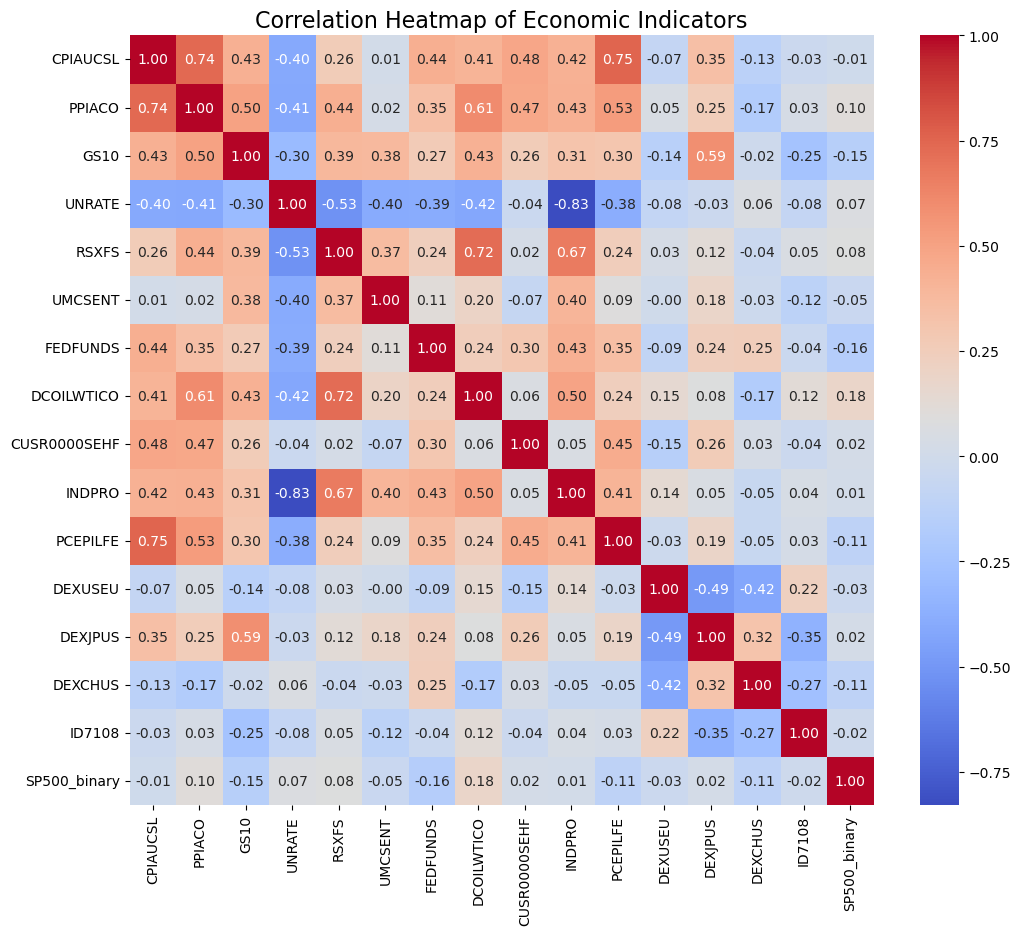

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Generate correlation matrix
correlation_matrix = lagged_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Set title and fontsize
heatmap.set_title('Correlation Heatmap of Economic Indicators', fontsize=16)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Show plot
plt.show()


# Feature selection

In [12]:
X = lagged_data.drop(columns=['SP500_binary']) 
y = lagged_data['SP500_binary']  # Dependent variable (target)

# Split data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
features = ['CPIAUCSL', 'PPIACO', 'GS10', 'UNRATE', 'RSXFS', 'UMCSENT', 
            'FEDFUNDS', 'DCOILWTICO', 'CUSR0000SEHF', 'INDPRO', 
            'PCEPILFE', 'DEXUSEU', 'DEXJPUS', 'DEXCHUS', 'GOLD']
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)

# Get the coefficients
coefficients = pd.DataFrame(ridge.coef_, index=features, columns=["Coefficient"])
selected_features = coefficients[coefficients["Coefficient"] != 0]

# Print selected features
print("Selected features after Ridge regularization:")
print(selected_features)

Selected features after Ridge regularization:
              Coefficient
CPIAUCSL         0.008117
PPIACO           0.004791
GS10            -0.152868
UNRATE           0.064729
RSXFS           -0.112466
UMCSENT          0.020678
FEDFUNDS        -0.127479
DCOILWTICO       0.262619
CUSR0000SEHF     0.086595
INDPRO           0.113349
PCEPILFE        -0.070836
DEXUSEU         -0.069231
DEXJPUS          0.093747
DEXCHUS         -0.042612
GOLD            -0.003598


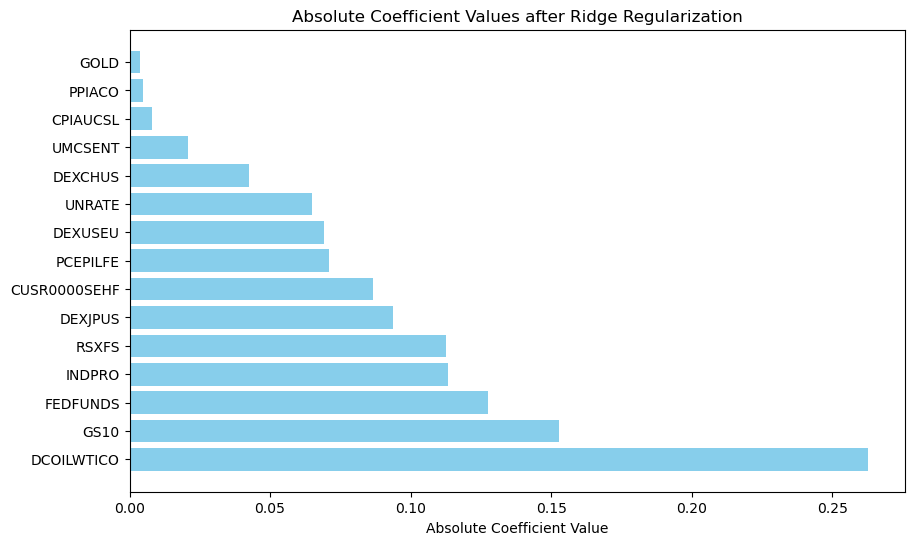

In [14]:
import matplotlib.pyplot as plt

# Get absolute values of coefficients
absolute_coefficients = coefficients.abs()

# Sort coefficients by absolute values
absolute_coefficients_sorted = absolute_coefficients.sort_values(by="Coefficient", ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(absolute_coefficients_sorted.index, absolute_coefficients_sorted["Coefficient"], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Absolute Coefficient Values after Ridge Regularization')
plt.show()


In [15]:
# Independent variables which has high coefficient value
X = lagged_data[['DCOILWTICO','GS10','FEDFUNDS','RSXFS','DEXJPUS']]  
y = lagged_data['SP500_binary']  # Dependent variable (target)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model

In [16]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

# Evaluate model

AUC: 68.88888888888889


/Users/quangtran/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


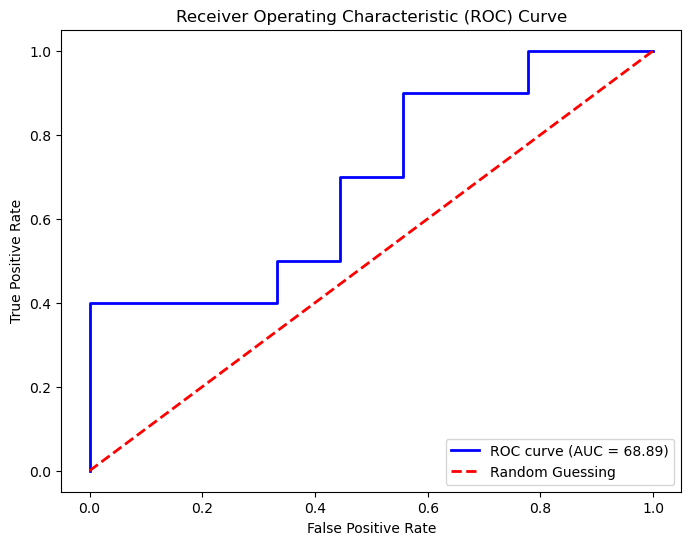

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate probabilities for positive class
y_prob = logistic_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)*100
print("AUC:", auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
